<a href="https://colab.research.google.com/github/Rohithtechis/Linear-Regression-project/blob/main/Linear_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [191]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [193]:
data=pd.read_csv('/content/SeoulBikeData.csv')
data.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [197]:
print('Dimension of dataset is',data.shape)

Dimension of dataset is (8760, 14)


In [198]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [201]:
data.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [202]:
data.dtypes

Date                         object
Rented Bike Count             int64
Hour                          int64
Temperature(C)              float64
Humidity(%)                   int64
Wind speed (m/s)            float64
Visibility (10m)              int64
Dew point temperature(C)    float64
Solar Radiation (MJ/m2)     float64
Rainfall(mm)                float64
Snowfall (cm)               float64
Seasons                      object
Holiday                      object
Functioning Day              object
dtype: object

In [203]:
# The factors that influence the number of bike rented.
df=data.columns[2:]
df

Index(['Hour', 'Temperature(C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [204]:
# ckecking the missing values
data.isna().sum()

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

In [205]:
from datetime import datetime
data.Date=pd.to_datetime(data.Date)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      8760 non-null   datetime64[ns]
 1   Rented Bike Count         8760 non-null   int64         
 2   Hour                      8760 non-null   int64         
 3   Temperature(C)            8760 non-null   float64       
 4   Humidity(%)               8760 non-null   int64         
 5   Wind speed (m/s)          8760 non-null   float64       
 6   Visibility (10m)          8760 non-null   int64         
 7   Dew point temperature(C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)   8760 non-null   float64       
 9   Rainfall(mm)              8760 non-null   float64       
 10  Snowfall (cm)             8760 non-null   float64       
 11  Seasons                   8760 non-null   object        
 12  Holiday             

In [206]:
data['Month']=pd.DatetimeIndex(data['Date']).month
data['Year']=pd.DatetimeIndex(data['Date']).year
data['tday']=pd.DatetimeIndex(data['Date']).day
data.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Year,tday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12


In [16]:
#Exploring the data for outliers and missing values.

In [207]:
data.dtypes

Date                        datetime64[ns]
Rented Bike Count                    int64
Hour                                 int64
Temperature(C)                     float64
Humidity(%)                          int64
Wind speed (m/s)                   float64
Visibility (10m)                     int64
Dew point temperature(C)           float64
Solar Radiation (MJ/m2)            float64
Rainfall(mm)                       float64
Snowfall (cm)                      float64
Seasons                             object
Holiday                             object
Functioning Day                     object
Month                                int64
Year                                 int64
tday                                 int64
dtype: object

In [ ]:
# We plot boxplot to find the outliers. 

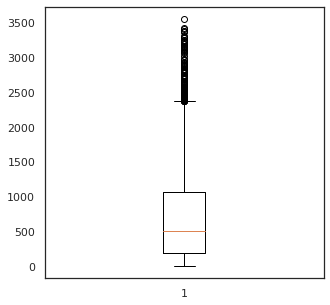

In [209]:
plt.figure(figsize=(5,5))
x=data['Rented Bike Count']
plt.boxplot(x)
plt.show()

In [210]:
d_ob=data.select_dtypes(include='object')
d_ob.head()

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes


In [211]:
# Lets add dummies for catagorical variables
data_cat=data
for cols in d_ob:
  dummies=pd.get_dummies(data[cols],drop_first=True)
  data_cat=pd.concat([data_cat,dummies],axis='columns')
data_cat.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Year,tday,Spring,Summer,Winter,No Holiday,Yes
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12,0,0,1,1,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12,0,0,1,1,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12,0,0,1,1,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12,0,0,1,1,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12,0,0,1,1,1


In [212]:
# Lets remove the outliers which are not in between 25% to 75%.

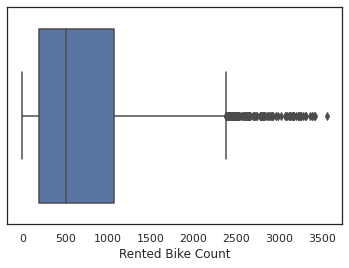

In [213]:
sns.boxplot(data['Rented Bike Count'])
plt.show()

In [214]:
# Removing the outliers
o1=np.percentile(data['Rented Bike Count'],25,interpolation='midpoint')
o2=np.percentile(data['Rented Bike Count'],50,interpolation='midpoint')
o3=np.percentile(data['Rented Bike Count'],75,interpolation='midpoint')
x=o3-o1
low=o1-1.5*x
high=o3+1.5*x
print('lower limit = ',low)
print('upper limit = ',high)

lower limit =  -1120.75
upper limit =  2377.25


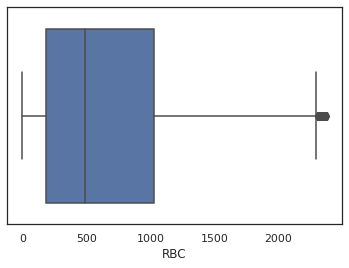

In [217]:
data.rename(columns={'Rented Bike Count':'RBC'}, inplace=True)
df=data[data.RBC< high]
df=df[df.RBC > low] 
sns.boxplot(df['RBC'])

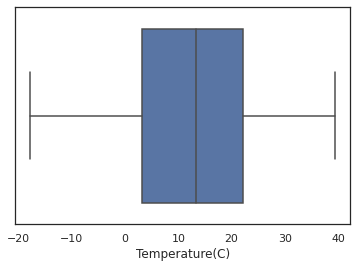

In [218]:
sns.boxplot(df['Temperature(C)'])

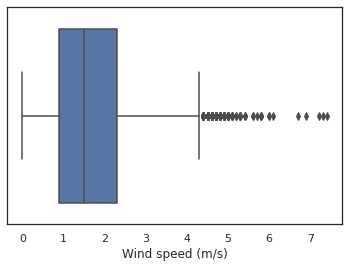

In [219]:
sns.boxplot(df['Wind speed (m/s)'])

In [220]:
# Lets change it for wind speed also
df.rename(columns={'Wind speed (m/s)':'WS'}, inplace=True)
o1=np.percentile(data['Wind speed (m/s)'],25,interpolation='midpoint')
o2=np.percentile(data['Wind speed (m/s)'],50,interpolation='midpoint')
o3=np.percentile(data['Wind speed (m/s)'],75,interpolation='midpoint')
x=o3-o1
low=o1-1.5*x
high=o3+1.5*x
print('lower limit = ',low)
print('upper limit = ',high)

lower limit =  -1.1999999999999997
upper limit =  4.3999999999999995


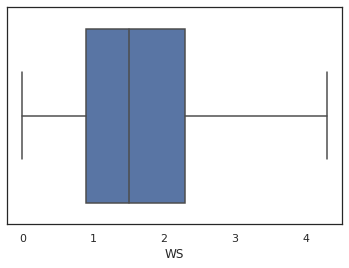

In [221]:
df=df[df.WS>low]
df=df[df.WS<high]
sns.boxplot(df.WS)

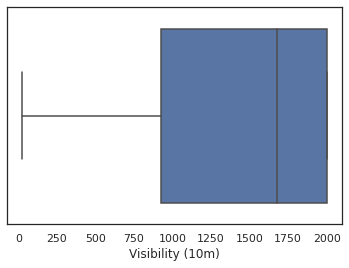

In [222]:
sns.boxplot(df['Visibility (10m)'])

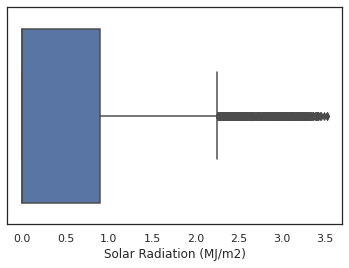

In [223]:
sns.boxplot(df['Solar Radiation (MJ/m2)'])

In [224]:
df.rename(columns={'Solar Radiation (MJ/m2)':'SR'},inplace=True)
o1=np.percentile(data['Solar Radiation (MJ/m2)'],25,interpolation='midpoint')
o2=np.percentile(data['Solar Radiation (MJ/m2)'],50,interpolation='midpoint')
o3=np.percentile(data['Solar Radiation (MJ/m2)'],75,interpolation='midpoint')
x=o3-o1
low=o1-1.5*x
high=o3+1.5*x
print('lower limit = ',low)
print('upper limit = ',high)

lower limit =  -1.395
upper limit =  2.325


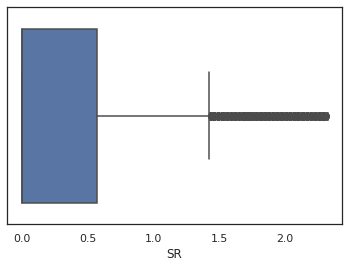

In [225]:
df=df[df.SR>low]
df=df[df.SR<high]
sns.boxplot(df.SR)

In [226]:
# Correlation between variables
data_corr=data_cat.corr()
data_corr

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Year,tday,Spring,Summer,Winter,No Holiday,Yes
Rented Bike Count,1.000000,4.102573e-01,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,7.086107e-02,0.215162,4.684885e-02,2.288822e-02,2.965494e-01,-4.249251e-01,0.072338,0.203943
Hour,0.410257,1.000000e+00,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,2.684858e-18,0.000000,1.598551e-19,1.686710e-19,1.686710e-19,-1.019481e-19,0.000000,0.005439
Temperature(C),0.538558,1.241145e-01,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,4.968327e-02,0.377796,8.090791e-02,7.959684e-03,6.658462e-01,-7.387196e-01,0.055931,-0.050170
Humidity(%),-0.199780,-2.416438e-01,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,4.779778e-02,0.035925,7.047359e-03,1.569416e-02,1.925949e-01,-2.382952e-01,0.050278,-0.020800
Wind speed (m/s),0.121108,2.851967e-01,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,-8.206909e-02,-0.003781,-6.123440e-02,8.385451e-02,-6.469790e-02,1.091865e-01,-0.023017,0.005037
Visibility (10m),0.199280,9.875348e-02,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,7.788783e-02,0.052381,-1.068595e-01,-1.874983e-01,6.195792e-02,8.616224e-03,-0.031773,-0.026000
Dew point temperature(C),0.379788,3.054372e-03,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,6.510073e-02,0.336350,6.970777e-02,2.055888e-03,6.523778e-01,-7.223664e-01,0.066759,-0.052837
Solar Radiation (MJ/m2),0.261837,1.451309e-01,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,-3.041240e-02,0.128086,-3.445555e-03,7.997416e-02,1.284017e-01,-1.784202e-01,0.005077,-0.007665
Rainfall(mm),-0.123074,8.714642e-03,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,-2.279368e-02,0.027522,1.199827e-02,1.759519e-02,5.392817e-02,-5.875456e-02,0.014269,0.002055
Snowfall (cm),-0.141804,-2.151645e-02,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,5.475846e-02,-0.206418,1.014355e-01,-9.978516e-02,-9.978516e-02,2.258745e-01,0.012591,0.032089


Correlation between the variables


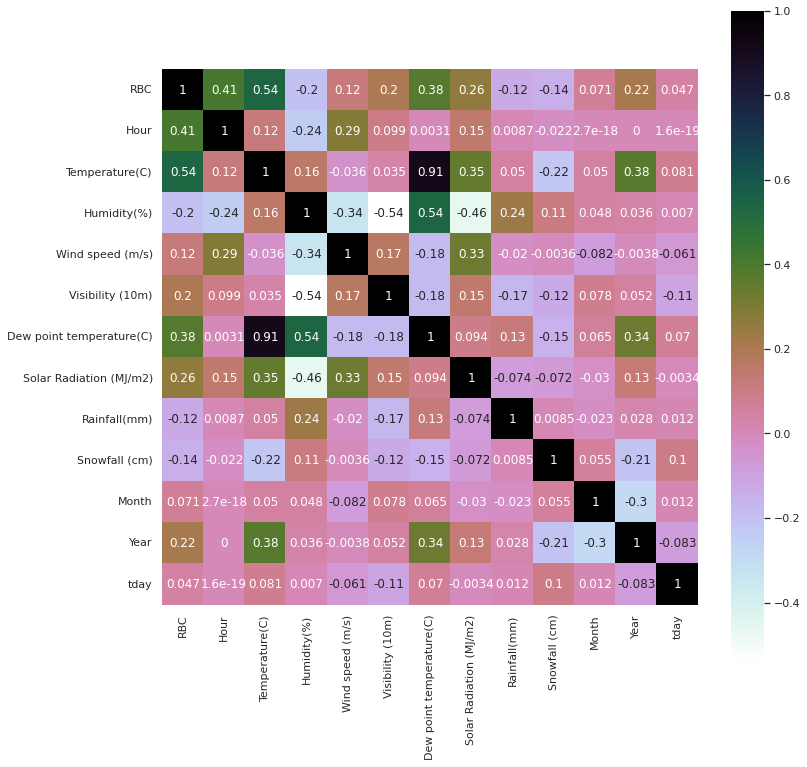

In [227]:
# Heatmap
corr=data.corr()
plt.figure(figsize=(12,12))
print('Correlation between the variables')
sns.heatmap(corr, annot=True , cmap='cubehelix_r', square=True)

We plot the heatmap to understant the correlation between the variables, with rented bike concidering the relation more the 30% are Hour, temperature(C) and Dew point tempature,  Hence the tempature and dew point tempature is highly correlated we can eliminate the Dew point tempature.


In [228]:
#Droping the Dew point tempature.
data =data.drop(['Dew point temperature(C)'],axis=1)

In [229]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     8760 non-null   datetime64[ns]
 1   RBC                      8760 non-null   int64         
 2   Hour                     8760 non-null   int64         
 3   Temperature(C)           8760 non-null   float64       
 4   Humidity(%)              8760 non-null   int64         
 5   Wind speed (m/s)         8760 non-null   float64       
 6   Visibility (10m)         8760 non-null   int64         
 7   Solar Radiation (MJ/m2)  8760 non-null   float64       
 8   Rainfall(mm)             8760 non-null   float64       
 9   Snowfall (cm)            8760 non-null   float64       
 10  Seasons                  8760 non-null   object        
 11  Holiday                  8760 non-null   object        
 12  Functioning Day          8760 non-

In [230]:
data.columns.values

array(['Date', 'RBC', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day', 'Month', 'Year', 'tday'], dtype=object)

In [231]:
data.drop(['Date','Seasons','Holiday','Functioning Day','Rainfall(mm)'],axis=1)


,RBC,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Snowfall (cm),Month,Year,tday
0,254,0,-5.2,37,2.2,2000,0.0,0.0,1,2017,12
1,204,1,-5.5,38,0.8,2000,0.0,0.0,1,2017,12
2,173,2,-6.0,39,1.0,2000,0.0,0.0,1,2017,12
3,107,3,-6.2,40,0.9,2000,0.0,0.0,1,2017,12
4,78,4,-6.0,36,2.3,2000,0.0,0.0,1,2017,12
...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,0.0,0.0,11,2018,30
8756,764,20,3.4,37,2.3,2000,0.0,0.0,11,2018,30
8757,694,21,2.6,39,0.3,1968,0.0,0.0,11,2018,30
8758,712,22,2.1,41,1.0,1859,0.0,0.0,11,2018,30


In [175]:
# Building the linear regression model to predict rented bike count by choosing appropriate independentvariables.

In [232]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [233]:
# 80% of dataset
X_train.shape, Y_train.shape

((7008, 11), (7008,))

In [234]:
# 20% of dataset
X_test.shape, Y_test.shape

((1752, 11), (1752,))

In [235]:
# Linear Regression Model
regr = linear_model.LinearRegression()
fitregr=regr.fit(X_train, Y_train)
predregrtrain=fitregr.predict(X_train)
predregrtest=fitregr.predict(X_test)

In [236]:
# Predicts the X_train
Y_pred_train = regr.predict(X_train)

In [238]:
print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))

Coefficients: [ 2.73174363e+01  3.08756143e+01 -7.53698534e+00  1.62038291e+01
  1.45219127e-02 -8.33357245e+01 -5.90917550e+01  2.17585277e+01
  1.20567462e+01  1.16607630e+02  7.54546452e-01]
Intercept: -234957.57818614857
Mean squared error (MSE): 221417.21
Coefficient of determination (R^2): 0.48


In [239]:
# Predicts the X_test
Y_pred_test = regr.predict(X_test)

In [243]:
print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_test))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_test))

Coefficients: [ 2.73174363e+01  3.08756143e+01 -7.53698534e+00  1.62038291e+01
  1.45219127e-02 -8.33357245e+01 -5.90917550e+01  2.17585277e+01
  1.20567462e+01  1.16607630e+02  7.54546452e-01]
Intercept: -234957.57818614857
Mean squared error (MSE): 207922.47
Coefficient of determination (R^2): 0.47


In [242]:
# Linear regression equation 
print('yintercept = %.2f' % regr.intercept_)
print('LogP = %.2f LogP' % regr.coef_[0])
print('MW = %.4f MW' % regr.coef_[1])
print('RB = %.4f RB' % regr.coef_[2])
print('AP = %.2f AP' % regr.coef_[3])

yintercept = -234957.58
LogP = 27.32 LogP
MW = 30.8756 MW
RB = -7.5370 RB
AP = 16.20 AP


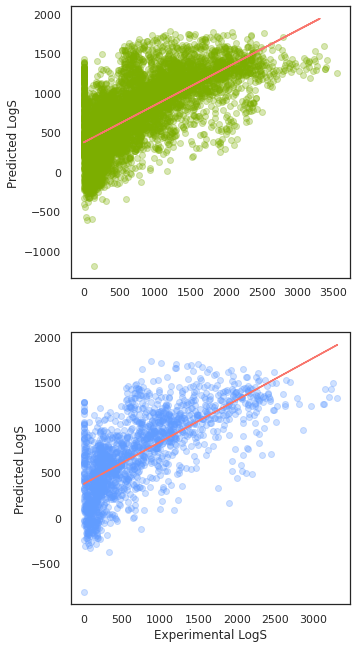

In [93]:
# Scatter plot of experimental vs. predicted Logs
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(5,11))
plt.subplot(2,1,1)
plt.scatter(x=Y_train,y=Y_pred_train, c='#7CAE00',alpha=0.3)
z=np.polyfit(Y_train,Y_pred_train,1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),'#F8766D')
plt.ylabel('Predicted Logs')

z = np.polyfit(Y_train, Y_pred_train, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")

plt.ylabel('Predicted LogS')

plt.subplot(2, 1, 2)
plt.scatter(x=Y_test, y=Y_pred_test, c="#619CFF", alpha=0.3)

z = np.polyfit(Y_test, Y_pred_test, 1)
p = np.poly1d(z)
plt.plot(Y_test,p(Y_test),"#F8766D")

plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')
plt.show()